In [1]:
import pandas as pd
#pd.__version__

import numpy as np
import glob
import os
import zipfile
import json

import requests
import gzip


**Importing books, fiction/non classification, authors, and book series JSON files**




In [2]:
#goodreads 2.3M metadata information to load

path = (r"C:\Users\alido\OneDrive\Desktop\goodreads_books.json.gz")
def load_data(file_name, head = 50000):
    count = 0
    data = []
    with gzip.open(file_name) as fin:
        for l in fin:
            d = json.loads(l)  
            count += 1
            data.append(d)
            # break if reaches the 100th line
            if (head is not None) and (count > head):
                break
    return data


In [3]:

books = load_data(os.path.join(path))

In [4]:
books_df = pd.DataFrame(books)
books_df[:10]

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,0312853122,1,[],US,,"[{'count': '3', 'name': 'to-read'}, {'count': ...",,false,4.00,,...,9,,1984,https://www.goodreads.com/book/show/5333265-w-...,https://images.gr-assets.com/books/1310220028m...,5333265,3,5400751,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film
1,0743509986,6,[],US,,"[{'count': '2634', 'name': 'to-read'}, {'count...",,false,3.23,B000FC0PBC,...,10,Abridged,2001,https://www.goodreads.com/book/show/1333909.Go...,https://s.gr-assets.com/assets/nophoto/book/11...,1333909,10,1323437,Good Harbor,Good Harbor
2,,7,[189911],US,eng,"[{'count': '58', 'name': 'to-read'}, {'count':...",B00071IKUY,false,4.03,,...,,Book Club Edition,1987,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,7327624,140,8948723,"The Unschooled Wizard (Sun Wolf and Starhawk, ...","The Unschooled Wizard (Sun Wolf and Starhawk, ..."
3,0743294297,3282,[],US,eng,"[{'count': '7615', 'name': 'to-read'}, {'count...",,false,3.49,B002ENBLOK,...,7,,2009,https://www.goodreads.com/book/show/6066819-be...,https://s.gr-assets.com/assets/nophoto/book/11...,6066819,51184,6243154,Best Friends Forever,Best Friends Forever
4,0850308712,5,[],US,,"[{'count': '32', 'name': 'to-read'}, {'count':...",,false,3.40,,...,,,,https://www.goodreads.com/book/show/287140.Run...,https://images.gr-assets.com/books/1413219371m...,287140,15,278577,Runic Astrology: Starcraft and Timekeeping in ...,Runic Astrology: Starcraft and Timekeeping in ...
5,1599150603,7,[],US,,"[{'count': '56', 'name': 'to-read'}, {'count':...",,false,4.13,B00DU10PUG,...,9,,2006,https://www.goodreads.com/book/show/287141.The...,https://s.gr-assets.com/assets/nophoto/book/11...,287141,46,278578,The Aeneid for Boys and Girls,The Aeneid for Boys and Girls
6,0425040887,4,[],US,,"[{'count': '14', 'name': 'to-read'}, {'count':...",,false,4.38,,...,3,,1979,https://www.goodreads.com/book/show/378460.The...,https://s.gr-assets.com/assets/nophoto/book/11...,378460,12,368291,The Wanting of Levine,The Wanting of Levine
7,1934876569,6,[151854],US,,"[{'count': '515', 'name': 'to-read'}, {'count'...",,false,4.22,,...,3,,2009,https://www.goodreads.com/book/show/6066812-al...,https://images.gr-assets.com/books/1316637798m...,6066812,98,701117,All's Fairy in Love and War (Avalon: Web of Ma...,All's Fairy in Love and War (Avalon: Web of Ma...
8,,4,[],US,,"[{'count': '4', 'name': 'to-read'}, {'count': ...",,true,3.86,,...,5,,2017,https://www.goodreads.com/book/show/34883016-p...,https://images.gr-assets.com/books/1493525974m...,34883016,5,56135087,Playmaker: A Venom Series Novella,Playmaker: A Venom Series Novella
9,0922915113,39,[],US,,"[{'count': '961', 'name': 'to-read'}, {'count'...",,false,3.81,B00AFYVB8Q,...,4,,2000,https://www.goodreads.com/book/show/287149.The...,https://images.gr-assets.com/books/1328768789m...,287149,986,278586,The Devil's Notebook,The Devil's Notebook


In [5]:
books_df= books_df.drop(columns=['image_url', "url" , "link", "popular_shelves"])

In [6]:
books_df.columns

Index(['isbn', 'text_reviews_count', 'series', 'country_code', 'language_code',
       'asin', 'is_ebook', 'average_rating', 'kindle_asin', 'similar_books',
       'description', 'format', 'authors', 'publisher', 'num_pages',
       'publication_day', 'isbn13', 'publication_month', 'edition_information',
       'publication_year', 'book_id', 'ratings_count', 'work_id', 'title',
       'title_without_series'],
      dtype='object')

In [7]:
books_df.authors

0         [{'author_id': '604031', 'role': ''}]
1         [{'author_id': '626222', 'role': ''}]
2          [{'author_id': '10333', 'role': ''}]
3           [{'author_id': '9212', 'role': ''}]
4         [{'author_id': '149918', 'role': ''}]
                          ...                  
49996    [{'author_id': '3275288', 'role': ''}]
49997    [{'author_id': '3510823', 'role': ''}]
49998       [{'author_id': '3515', 'role': ''}]
49999    [{'author_id': '7418796', 'role': ''}]
50000    [{'author_id': '5829106', 'role': ''}]
Name: authors, Length: 50001, dtype: object

In [211]:
books_df.shape

(49992, 26)

In [8]:
#importing books genre/features json file


z = (r"C:\Users\alido\OneDrive\Desktop\goodreads_book_genres_initial.json.gz")
genre_df = pd.read_json(z, lines = True)
genre_df


,book_id,genres
0,5333265,"{'history, historical fiction, biography': 1}"
1,1333909,"{'fiction': 219, 'history, historical fiction,..."
2,7327624,"{'fantasy, paranormal': 31, 'fiction': 8, 'mys..."
3,6066819,"{'fiction': 555, 'romance': 23, 'mystery, thri..."
4,287140,{'non-fiction': 3}
...,...,...
2360650,3084038,"{'non-fiction': 5, 'history, historical fictio..."
2360651,26168430,"{'mystery, thriller, crime': 4, 'children': 1,..."
2360652,2342551,"{'poetry': 14, 'children': 7, 'young-adult': 1..."
2360653,22017381,"{'romance': 13, 'mystery, thriller, crime': 2}"


In [9]:
genre_df.dropna(inplace = True)

In [10]:
genre_df

,book_id,genres
0,5333265,"{'history, historical fiction, biography': 1}"
1,1333909,"{'fiction': 219, 'history, historical fiction,..."
2,7327624,"{'fantasy, paranormal': 31, 'fiction': 8, 'mys..."
3,6066819,"{'fiction': 555, 'romance': 23, 'mystery, thri..."
4,287140,{'non-fiction': 3}
...,...,...
2360650,3084038,"{'non-fiction': 5, 'history, historical fictio..."
2360651,26168430,"{'mystery, thriller, crime': 4, 'children': 1,..."
2360652,2342551,"{'poetry': 14, 'children': 7, 'young-adult': 1..."
2360653,22017381,"{'romance': 13, 'mystery, thriller, crime': 2}"


In [11]:
#importing authors json file

k = (r"C:\Users\alido\OneDrive\Desktop\goodreads_book_authors.json.gz")
authors_df = pd.read_json(k, lines = True)

In [12]:
authors_df=authors_df.dropna()

In [13]:
authors_df

,average_rating,author_id,text_reviews_count,name,ratings_count
0,3.98,604031,7,Ronald J. Fields,49
1,4.08,626222,28716,Anita Diamant,546796
2,3.92,10333,5075,Barbara Hambly,122118
3,3.68,9212,36262,Jennifer Weiner,888522
4,3.82,149918,96,Nigel Pennick,1740
...,...,...,...,...,...
829524,4.36,197551,4,Patty Furbush,11
829525,4.33,3988103,3,Jim Schlinkman,6
829526,4.00,13464507,2,Rich Jolly,18
829527,3.31,7427847,1,sr@ mwrGn,13


In [14]:
#importing book series json file


d = (r"C:\Users\alido\OneDrive\Desktop\goodreads_book_series.json.gz")
book_series_df = pd.read_json(d, lines = True)
book_series_df = book_series_df.dropna()

In [15]:
book_series_df

,numbered,note,description,title,series_works_count,series_id,primary_work_count
0,true,,,Sun Wolf and Starhawk,9,189911,3
1,true,,This series is also known as * Avalon : Jalina...,Avalon: Web of Magic,14,151854,12
2,true,,"Plot-wise, ""Crowner's Crusade"" is a prequel to...",Crowner John Mystery,15,169353,15
3,true,,,Pluto's Snitch,3,1052227,3
4,false,,,"The Way, With The Enchanted Neighborhood",3,1070125,3
...,...,...,...,...,...,...,...
400385,true,,,"Chop, Chop",12,385803,10
400386,false,,"Seriia ""Tepli istoriyi"" narodilasia zavdiaki t...",Tepli istoriyi,20,990794,20
400387,true,,,Ondine Quartet,12,494165,4
400388,true,,,The Trailsman,397,434645,397


**Merge author's json, genre json, and book series json on one dataframe**

1. Merge author's features dataset on the author_ids in the books dataframe

In [16]:
books_df.authors

0         [{'author_id': '604031', 'role': ''}]
1         [{'author_id': '626222', 'role': ''}]
2          [{'author_id': '10333', 'role': ''}]
3           [{'author_id': '9212', 'role': ''}]
4         [{'author_id': '149918', 'role': ''}]
                          ...                  
49996    [{'author_id': '3275288', 'role': ''}]
49997    [{'author_id': '3510823', 'role': ''}]
49998       [{'author_id': '3515', 'role': ''}]
49999    [{'author_id': '7418796', 'role': ''}]
50000    [{'author_id': '5829106', 'role': ''}]
Name: authors, Length: 50001, dtype: object

Under the "authors" column, all of the author id's in nested dictionaries, we want to extract the first author_id from each list and create as a new column 

In [17]:
# extract all the author id's and set as a new column in books dataframe


books_df = books_df[(books_df['authors'].str.len() != 0)] #remove all empty lists

In [18]:
books_df.authors

0         [{'author_id': '604031', 'role': ''}]
1         [{'author_id': '626222', 'role': ''}]
2          [{'author_id': '10333', 'role': ''}]
3           [{'author_id': '9212', 'role': ''}]
4         [{'author_id': '149918', 'role': ''}]
                          ...                  
49996    [{'author_id': '3275288', 'role': ''}]
49997    [{'author_id': '3510823', 'role': ''}]
49998       [{'author_id': '3515', 'role': ''}]
49999    [{'author_id': '7418796', 'role': ''}]
50000    [{'author_id': '5829106', 'role': ''}]
Name: authors, Length: 49992, dtype: object

In [19]:
def extract_author(x):
    #try:
    return x[0]['author_id']

In [20]:
books_df['author_id'] = books_df.authors.apply(lambda x:  extract_author(x))
books_df['author_id'] = books_df['author_id'].astype(int)

In [21]:
books_df.author_id

0         604031
1         626222
2          10333
3           9212
4         149918
          ...   
49996    3275288
49997    3510823
49998       3515
49999    7418796
50000    5829106
Name: author_id, Length: 49992, dtype: int32

In [22]:
books_df[:10]

,isbn,text_reviews_count,series,country_code,language_code,asin,is_ebook,average_rating,kindle_asin,similar_books,...,isbn13,publication_month,edition_information,publication_year,book_id,ratings_count,work_id,title,title_without_series,author_id
0,0312853122,1,[],US,,,false,4.00,,[],...,9780312853129,9,,1984,5333265,3,5400751,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film,604031
1,0743509986,6,[],US,,,false,3.23,B000FC0PBC,"[8709549, 17074050, 28937, 158816, 228563, 112...",...,9780743509985,10,Abridged,2001,1333909,10,1323437,Good Harbor,Good Harbor,626222
2,,7,[189911],US,eng,B00071IKUY,false,4.03,,"[19997, 828466, 1569323, 425389, 1176674, 2627...",...,,,Book Club Edition,1987,7327624,140,8948723,"The Unschooled Wizard (Sun Wolf and Starhawk, ...","The Unschooled Wizard (Sun Wolf and Starhawk, ...",10333
3,0743294297,3282,[],US,eng,,false,3.49,B002ENBLOK,"[6604176, 6054190, 2285777, 82641, 7569453, 70...",...,9780743294294,7,,2009,6066819,51184,6243154,Best Friends Forever,Best Friends Forever,9212
4,0850308712,5,[],US,,,false,3.40,,[],...,9780850308716,,,,287140,15,278577,Runic Astrology: Starcraft and Timekeeping in ...,Runic Astrology: Starcraft and Timekeeping in ...,149918
5,1599150603,7,[],US,,,false,4.13,B00DU10PUG,[],...,9781599150604,9,,2006,287141,46,278578,The Aeneid for Boys and Girls,The Aeneid for Boys and Girls,3041852
6,0425040887,4,[],US,,,false,4.38,,[],...,9780425040881,3,,1979,378460,12,368291,The Wanting of Levine,The Wanting of Levine,215594
7,1934876569,6,[151854],US,,,false,4.22,,"[948696, 439885, 274955, 12978730, 372986, 216...",...,9781934876565,3,,2009,6066812,98,701117,All's Fairy in Love and War (Avalon: Web of Ma...,All's Fairy in Love and War (Avalon: Web of Ma...,19158
8,,4,[],US,,,true,3.86,,[],...,9781370889471,5,,2017,34883016,5,56135087,Playmaker: A Venom Series Novella,Playmaker: A Venom Series Novella,5807700
9,0922915113,39,[],US,,,false,3.81,B00AFYVB8Q,"[287151, 1104760, 1172822, 440292, 287082, 630...",...,9780922915118,4,,2000,287149,986,278586,The Devil's Notebook,The Devil's Notebook,2983296


Now that author_id's have been extracted, we can join the authors_df with the books_df on the author id's

In [23]:
authors_df["author_id"] = authors_df["author_id"].astype(int)

In [24]:
books_df["author_id"]= books_df["author_id"].astype(int)

In [25]:
merged = pd.merge(left=books_df, right=authors_df, left_on='author_id', right_on='author_id')
merged[:4]

,isbn,text_reviews_count_x,series,country_code,language_code,asin,is_ebook,average_rating_x,kindle_asin,similar_books,...,book_id,ratings_count_x,work_id,title,title_without_series,author_id,average_rating_y,text_reviews_count_y,name,ratings_count_y
0,0312853122,1,[],US,,,false,4.00,,[],...,5333265,3,5400751,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film,604031,3.98,7,Ronald J. Fields,49
1,0743509986,6,[],US,,,false,3.23,B000FC0PBC,"[8709549, 17074050, 28937, 158816, 228563, 112...",...,1333909,10,1323437,Good Harbor,Good Harbor,626222,4.08,28716,Anita Diamant,546796
2,1250066611,19,[],US,eng,,false,4.16,B0759TPNWM,"[405146, 828672, 130970, 114469, 3273, 358494,...",...,22240073,134,1041558,The Red Tent,The Red Tent,626222,4.08,28716,Anita Diamant,546796
3,0330487965,60,[],US,,,false,4.16,B0759TPNWM,"[405146, 828672, 130970, 114469, 3273, 358494,...",...,829305,460,1041558,The Red Tent,The Red Tent,626222,4.08,28716,Anita Diamant,546796


In [26]:
merged.columns

Index(['isbn', 'text_reviews_count_x', 'series', 'country_code',
       'language_code', 'asin', 'is_ebook', 'average_rating_x', 'kindle_asin',
       'similar_books', 'description', 'format', 'authors', 'publisher',
       'num_pages', 'publication_day', 'isbn13', 'publication_month',
       'edition_information', 'publication_year', 'book_id', 'ratings_count_x',
       'work_id', 'title', 'title_without_series', 'author_id',
       'average_rating_y', 'text_reviews_count_y', 'name', 'ratings_count_y'],
      dtype='object')

In [27]:
merged=merged.rename(columns = {"text_reviews_count_x": "books_reviews_count", "average_rating_x" : "books_average_rating", "ratings_count_x": "books_ratings_count", "average_rating_y": "authors_average_rating", "text_reviews_count_y": "authors_text_reviews_count", "ratings_count_y": "authors_ratings_count"})

In [28]:
merged[:4]

,isbn,books_reviews_count,series,country_code,language_code,asin,is_ebook,books_average_rating,kindle_asin,similar_books,...,book_id,books_ratings_count,work_id,title,title_without_series,author_id,authors_average_rating,authors_text_reviews_count,name,authors_ratings_count
0,0312853122,1,[],US,,,false,4.00,,[],...,5333265,3,5400751,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film,604031,3.98,7,Ronald J. Fields,49
1,0743509986,6,[],US,,,false,3.23,B000FC0PBC,"[8709549, 17074050, 28937, 158816, 228563, 112...",...,1333909,10,1323437,Good Harbor,Good Harbor,626222,4.08,28716,Anita Diamant,546796
2,1250066611,19,[],US,eng,,false,4.16,B0759TPNWM,"[405146, 828672, 130970, 114469, 3273, 358494,...",...,22240073,134,1041558,The Red Tent,The Red Tent,626222,4.08,28716,Anita Diamant,546796
3,0330487965,60,[],US,,,false,4.16,B0759TPNWM,"[405146, 828672, 130970, 114469, 3273, 358494,...",...,829305,460,1041558,The Red Tent,The Red Tent,626222,4.08,28716,Anita Diamant,546796


In [29]:
merged.columns

Index(['isbn', 'books_reviews_count', 'series', 'country_code',
       'language_code', 'asin', 'is_ebook', 'books_average_rating',
       'kindle_asin', 'similar_books', 'description', 'format', 'authors',
       'publisher', 'num_pages', 'publication_day', 'isbn13',
       'publication_month', 'edition_information', 'publication_year',
       'book_id', 'books_ratings_count', 'work_id', 'title',
       'title_without_series', 'author_id', 'authors_average_rating',
       'authors_text_reviews_count', 'name', 'authors_ratings_count'],
      dtype='object')

The new merged_df now has the author's features joined with the books features on the author_ids

2. Extract all non fiction and fiction classifications for books, and join on the new merged dataframe

In [30]:
genre_df.genres

0              {'history, historical fiction, biography': 1}
1          {'fiction': 219, 'history, historical fiction,...
2          {'fantasy, paranormal': 31, 'fiction': 8, 'mys...
3          {'fiction': 555, 'romance': 23, 'mystery, thri...
4                                         {'non-fiction': 3}
                                 ...                        
2360650    {'non-fiction': 5, 'history, historical fictio...
2360651    {'mystery, thriller, crime': 4, 'children': 1,...
2360652    {'poetry': 14, 'children': 7, 'young-adult': 1...
2360653       {'romance': 13, 'mystery, thriller, crime': 2}
2360654                        {'romance': 19, 'fiction': 4}
Name: genres, Length: 2360655, dtype: object

Genres_df contains a lot of extraneous classifications and data that won't be needed in our analysis, we want to extract only the "fiction" and "nonfiction" classifications for each book_id

In [31]:
genre_df.genres = genre_df.genres.apply(lambda x: list(x.keys()))

In [32]:
genre_df.genres

0                   [history, historical fiction, biography]
1          [fiction, history, historical fiction, biography]
2          [fantasy, paranormal, fiction, mystery, thrill...
3               [fiction, romance, mystery, thriller, crime]
4                                              [non-fiction]
                                 ...                        
2360650    [non-fiction, history, historical fiction, bio...
2360651        [mystery, thriller, crime, children, fiction]
2360652         [poetry, children, young-adult, non-fiction]
2360653                  [romance, mystery, thriller, crime]
2360654                                   [romance, fiction]
Name: genres, Length: 2360655, dtype: object

In [33]:
genre_df

,book_id,genres
0,5333265,"[history, historical fiction, biography]"
1,1333909,"[fiction, history, historical fiction, biography]"
2,7327624,"[fantasy, paranormal, fiction, mystery, thrill..."
3,6066819,"[fiction, romance, mystery, thriller, crime]"
4,287140,[non-fiction]
...,...,...
2360650,3084038,"[non-fiction, history, historical fiction, bio..."
2360651,26168430,"[mystery, thriller, crime, children, fiction]"
2360652,2342551,"[poetry, children, young-adult, non-fiction]"
2360653,22017381,"[romance, mystery, thriller, crime]"


In [34]:
new_genre_df = genre_df[genre_df['genres'].str.len()>0]

In [35]:

new_genre_df = genre_df["genres"].apply(lambda x : ' '.join(x).replace(',',' ').split())

In [36]:
new_genre_df

0                  [history, historical, fiction, biography]
1          [fiction, history, historical, fiction, biogra...
2          [fantasy, paranormal, fiction, mystery, thrill...
3               [fiction, romance, mystery, thriller, crime]
4                                              [non-fiction]
                                 ...                        
2360650    [non-fiction, history, historical, fiction, bi...
2360651        [mystery, thriller, crime, children, fiction]
2360652         [poetry, children, young-adult, non-fiction]
2360653                  [romance, mystery, thriller, crime]
2360654                                   [romance, fiction]
Name: genres, Length: 2360655, dtype: object

Each values are seperated string values rather to easily extract "nonfiction" and "fiction" strings

In [37]:
# Non-fiction: 1, fiction: 0, binary classification

genre_df['fiction_or_nonFiction'] = new_genre_df.apply(lambda x : 1 if ("non-fiction" in x) else 0)

In [38]:
genre_df

,book_id,genres,fiction_or_nonFiction
0,5333265,"[history, historical fiction, biography]",0
1,1333909,"[fiction, history, historical fiction, biography]",0
2,7327624,"[fantasy, paranormal, fiction, mystery, thrill...",0
3,6066819,"[fiction, romance, mystery, thriller, crime]",0
4,287140,[non-fiction],1
...,...,...,...
2360650,3084038,"[non-fiction, history, historical fiction, bio...",1
2360651,26168430,"[mystery, thriller, crime, children, fiction]",0
2360652,2342551,"[poetry, children, young-adult, non-fiction]",1
2360653,22017381,"[romance, mystery, thriller, crime]",0


In [39]:
merged["book_id"] = merged["book_id"].astype(int)
genre_df["book_id"] = genre_df["book_id"].astype(int)

In [40]:
merged = merged.join(genre_df.set_index('book_id'), on = 'book_id')

In [41]:
merged[100:300]

,isbn,books_reviews_count,series,country_code,language_code,asin,is_ebook,books_average_rating,kindle_asin,similar_books,...,work_id,title,title_without_series,author_id,authors_average_rating,authors_text_reviews_count,name,authors_ratings_count,genres,fiction_or_nonFiction
100,8610012735,7,[687725],US,srp,,false,3.92,,"[15802120, 12860638, 29875363, 18667817, 34947...",...,26680281,"Gospodin Mercedes (Bill Hodges Trilogy, #1)","Gospodin Mercedes (Bill Hodges Trilogy, #1)",3389,4.01,367487,Stephen King,10666719,"[fiction, mystery, thriller, crime]",0
101,0452284724,54,[152256],US,en-US,,false,4.24,B018ER7IMS,"[9810195, 10596, 32627, 116982, 400906, 459064...",...,750558,"Wizard and Glass (The Dark Tower, #4)","Wizard and Glass (The Dark Tower, #4)",3389,4.01,367487,Stephen King,10666719,"[fantasy, paranormal, fiction, mystery, thrill...",0
102,1848941145,2,[179872],US,eng,,true,3.98,,"[8728918, 349473, 12495799, 938544, 60832, 324...",...,1178083,"Song of Susannah (The Dark Tower, #6)","Song of Susannah (The Dark Tower, #6)",3389,4.01,367487,Stephen King,10666719,"[fantasy, paranormal, fiction, mystery, thrill...",0
103,,119,[],US,eng,,true,3.88,,"[28514417, 22886631, 22888764, 25066755, 86645...",...,51277695,Cookie Jar: A Short Story,Cookie Jar: A Short Story,3389,4.01,367487,Stephen King,10666719,"[fantasy, paranormal, fiction, mystery, thrill...",0
104,1444708139,99,[],US,,,false,3.92,B00K3NEE56,"[10596, 397872, 6555, 34605, 733895, 32430, 11...",...,150017,Pet Sematary,Pet Sematary,3389,4.01,367487,Stephen King,10666719,"[fiction, fantasy, paranormal, mystery, thrill...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0563510218,3,[],US,eng,,false,3.64,,[],...,56748789,Mrs. McGinty's Dead: A BBC Radio 4 Full-Cast D...,Mrs. McGinty's Dead: A BBC Radio 4 Full-Cast D...,123715,3.97,115724,Agatha Christie,2559239,"[mystery, thriller, crime]",0
296,,1,[227079],US,nor,,false,3.80,,"[280990, 1332179, 2008927, 383223, 192888, 311...",...,625995,Den åpne graven (Hercule Poirot #2),Den åpne graven (Hercule Poirot #2),123715,3.97,115724,Agatha Christie,2559239,"[mystery, thriller, crime, fiction, romance, h...",0
297,,13,[],US,,B00IV3C7XG,true,3.90,,"[18129413, 11839857, 11002331, 1867852, 250675...",...,17942773,The Chocolate Box,The Chocolate Box,123715,3.97,115724,Agatha Christie,2559239,"[mystery, thriller, crime, fiction, history, h...",0
298,9724144410,5,[],US,por,,false,3.78,,"[383181, 311166, 281415, 141213, 192887, 1891121]",...,2515738,Intriga em Bagdade,Intriga em Bagdade,123715,3.97,115724,Agatha Christie,2559239,"[mystery, thriller, crime, fiction, history, h...",0


In [42]:
merged.shape

(49992, 32)

Extract classification on whether or not the book is part of series

In [43]:
book_series_df

,numbered,note,description,title,series_works_count,series_id,primary_work_count
0,true,,,Sun Wolf and Starhawk,9,189911,3
1,true,,This series is also known as * Avalon : Jalina...,Avalon: Web of Magic,14,151854,12
2,true,,"Plot-wise, ""Crowner's Crusade"" is a prequel to...",Crowner John Mystery,15,169353,15
3,true,,,Pluto's Snitch,3,1052227,3
4,false,,,"The Way, With The Enchanted Neighborhood",3,1070125,3
...,...,...,...,...,...,...,...
400385,true,,,"Chop, Chop",12,385803,10
400386,false,,"Seriia ""Tepli istoriyi"" narodilasia zavdiaki t...",Tepli istoriyi,20,990794,20
400387,true,,,Ondine Quartet,12,494165,4
400388,true,,,The Trailsman,397,434645,397


In [44]:
merged.series

0        []
1        []
2        []
3        []
4        []
         ..
49987    []
49988    []
49989    []
49990    []
49991    []
Name: series, Length: 49992, dtype: object

If the series has an id in the list, we want to apply a binomial classification to it as a new column

In [45]:
merged["series or not"]= merged.series.apply(lambda x: 1 if (len(x)> 0 ) else 0)

In [46]:
merged[["series", "series or not"]]

,series,series or not
0,[],0
1,[],0
2,[],0
3,[],0
4,[],0
...,...,...
49987,[],0
49988,[],0
49989,[],0
49990,[],0


In [47]:
merged.series


0        []
1        []
2        []
3        []
4        []
         ..
49987    []
49988    []
49989    []
49990    []
49991    []
Name: series, Length: 49992, dtype: object

Basic Exploration of the final dataframe, merged_df.

In [49]:
merged.shape

(49992, 33)

In [50]:
merged.isnull().sum()

isbn                          0
books_reviews_count           0
series                        0
country_code                  0
language_code                 0
asin                          0
is_ebook                      0
books_average_rating          0
kindle_asin                   0
similar_books                 0
description                   0
format                        0
authors                       0
publisher                     0
num_pages                     0
publication_day               0
isbn13                        0
publication_month             0
edition_information           0
publication_year              0
book_id                       0
books_ratings_count           0
work_id                       0
title                         0
title_without_series          0
author_id                     0
authors_average_rating        0
authors_text_reviews_count    0
name                          0
authors_ratings_count         0
genres                        0
fiction_

In [51]:
merged.columns

Index(['isbn', 'books_reviews_count', 'series', 'country_code',
       'language_code', 'asin', 'is_ebook', 'books_average_rating',
       'kindle_asin', 'similar_books', 'description', 'format', 'authors',
       'publisher', 'num_pages', 'publication_day', 'isbn13',
       'publication_month', 'edition_information', 'publication_year',
       'book_id', 'books_ratings_count', 'work_id', 'title',
       'title_without_series', 'author_id', 'authors_average_rating',
       'authors_text_reviews_count', 'name', 'authors_ratings_count', 'genres',
       'fiction_or_nonFiction', 'series or not'],
      dtype='object')

**Now that we have cleaned up and joined all the essential datasets, we can set up 3 dataframes and specific variables that will be used to  test and predict book's success**

A. Research Question 1 - Book's success based of the average rating: take the log weighted rating of each book by multipleying the average rating of each book by the number of ratings to get the true rating/sucess of the book

In [52]:
RQ1_filtered = merged[["title", "author_id","description","books_average_rating","books_ratings_count", "publication_year"]]

In [53]:
## Take the log weighted rating to avoid bias. For example, an author could have  a 5 star average rating but it could be based of only 1 rating count. 
##Log weighted rating eliminates this bias. 


RQ1_filtered["log_weighted_rating"] = np.log(pd.to_numeric(RQ1_filtered["books_average_rating"])*pd.to_numeric(RQ1_filtered["books_ratings_count"]))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [54]:
RQ1_filtered = RQ1_filtered.sort_values(by='log_weighted_rating', ascending=False)

In [55]:
RQ1_filtered

,title,author_id,description,books_average_rating,books_ratings_count,publication_year,log_weighted_rating
6750,"The Girl Who Played with Fire (Millennium, #2)",706255,The Expose\nMillenniumpublisher Mikael Blomkvi...,4.22,575163,2009,14.702244
32281,"Unbroken: A World War II Story of Survival, Re...",30913,"In her long-awaited new book, Laura Hillenbran...",4.39,504961,2010,14.611566
7489,The Name of the Wind (The Kingkiller Chronicle...,108424,"Told in Kvothe's own voice, this is the tale o...",4.55,416634,2007,14.455091
2022,"Jurassic Park (Jurassic Park, #1)",5194,"En esta espectacular novela, los dinosaurios v...",3.97,447936,2006,14.391172
15815,The Five People You Meet in Heaven,2331,"From the author of Tuesdays with Morrie, a nov...",3.90,453494,2003,14.385714
...,...,...,...,...,...,...,...
27618,Súper Héroe por los pelos y el barbero malvado,8277958,,0.00,0,2013,-inf
21716,Tug-of-War,7160484,"Tug-of-War: A Murderous Short Story (5,110 wor...",0.00,0,2013,-inf
9390,& fils,7304368,C'est a l'enterrement de son meilleur ami qu'A...,3.37,0,2015,-inf
27625,Savas's Wildcat,109977,"Yiannis Savas, the irresistible playboy of the...",3.33,0,2012,-inf


In [56]:
topBooks = RQ1_filtered[["title","log_weighted_rating"]].sort_values(by='log_weighted_rating', ascending=False)[:10]
topBooks

,title,log_weighted_rating
6750,"The Girl Who Played with Fire (Millennium, #2)",14.702244
32281,"Unbroken: A World War II Story of Survival, Re...",14.611566
7489,The Name of the Wind (The Kingkiller Chronicle...,14.455091
2022,"Jurassic Park (Jurassic Park, #1)",14.391172
15815,The Five People You Meet in Heaven,14.385714
2303,"Shiver (The Wolves of Mercy Falls, #1)",14.126174
2096,Good Omens: The Nice and Accurate Prophecies o...,14.082922
2416,"The Eye of the World (Wheel of Time, #1)",13.925293
9206,Anna and the French Kiss (Anna and the French ...,13.900009
1525,"Betrayed (House of Night, #2)",13.607402


In [58]:
merged["log_weighted_rating"]= np.log(pd.to_numeric(merged["books_average_rating"])*pd.to_numeric(merged["books_ratings_count"]))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [59]:
#RQ1_filtered.to_csv("RQ1_filtered.csv")

B. Research Question 2: Do nonfiction/fiction binomial classifications contribute to books success, with success measured by books_average_rating?

In [60]:
RQ2_filtered = merged [["title", "name", "description", "books_average_rating", "books_ratings_count", "genres", "fiction_or_nonFiction"]]

In [133]:
RQ2_filtered[:5]

,title,name,description,books_average_rating,books_ratings_count,genres,fiction_or_nonFiction
0,W.C. Fields: A Life on Film,Ronald J. Fields,,4.00,3,"[history, historical fiction, biography]",0
1,Good Harbor,Anita Diamant,"Anita Diamant's international bestseller ""The ...",3.23,10,"[fiction, history, historical fiction, biography]",0
2,The Red Tent,Anita Diamant,IN THE RED TENT--NOW A MAJOR LIFETIME MINISERI...,4.16,134,"[fiction, history, historical fiction, biograp...",0
3,The Red Tent,Anita Diamant,The red tent is the place where women gathered...,4.16,460,"[fiction, history, historical fiction, biograp...",0
4,"Saying Kaddish: How to Comfort the Dying, Bury...",Anita Diamant,"Anita Diamant's knowledge, sensitivity, and cl...",4.16,107,"[non-fiction, history, historical fiction, bio...",1


In [62]:
#RQ2_filtered.to_csv("RQ2_filtered.csv")

C. Research Question 3: Are books that are a part of a series more sucessful than standalone books?

In [63]:
RQ3_filtered = merged [["title", "name", "description", "books_average_rating", "series",  "fiction_or_nonFiction", "series or not"]]

In [134]:
RQ3_filtered[:5]

,title,name,description,books_average_rating,series,fiction_or_nonFiction,series or not
0,W.C. Fields: A Life on Film,Ronald J. Fields,,4.00,[],0,0
1,Good Harbor,Anita Diamant,"Anita Diamant's international bestseller ""The ...",3.23,[],0,0
2,The Red Tent,Anita Diamant,IN THE RED TENT--NOW A MAJOR LIFETIME MINISERI...,4.16,[],0,0
3,The Red Tent,Anita Diamant,The red tent is the place where women gathered...,4.16,[],0,0
4,"Saying Kaddish: How to Comfort the Dying, Bury...",Anita Diamant,"Anita Diamant's knowledge, sensitivity, and cl...",4.16,[],1,0


In [65]:
#RQ3_filtered.to_csv("RQ3_filtered.csv")

## *Bonus Features to explore*

D. Research Question 4: Does author's historical popularity contribute to the success of their books?

In [66]:
RQ4_filtered = merged[["title","name", "author_id","authors_average_rating","authors_ratings_count"]]


In [67]:
RQ4_filtered["author_log_weighted_rating"] = np.log(pd.to_numeric(RQ4_filtered["authors_average_rating"])*pd.to_numeric(RQ4_filtered["authors_ratings_count"]))
RQ4_filtered = RQ4_filtered.sort_values(by='author_log_weighted_rating', ascending=False)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [135]:
RQ4_filtered[:5]

,title,name,author_id,authors_average_rating,authors_ratings_count,author_log_weighted_rating
7220,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,1077326,4.44,18532721,18.225703
7202,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,1077326,4.44,18532721,18.225703
7204,Harry Potter and the Philosopher's Stone,J.K. Rowling,1077326,4.44,18532721,18.225703
7205,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,1077326,4.44,18532721,18.225703
7206,Harry Potter ja salaisuuksien kammio (Harry Po...,J.K. Rowling,1077326,4.44,18532721,18.225703


In [69]:
topAuthors = RQ4_filtered[["name","authors_average_rating"]]
topAuthors1 = topAuthors.drop_duplicates()
topAuthors1

,name,authors_average_rating
7220,J.K. Rowling,4.44
93,Stephen King,4.01
6128,Suzanne Collins,4.27
10624,Stephenie Meyer,3.64
2273,J.R.R. Tolkien,4.31
...,...,...
1052,Academy Imprints,0.00
49294,Mori Kouichiro,0.00
44919,Molly Black,0.00
34876,Noora Lintukangas,0.00


In [70]:
new=topAuthors1.head(10)
new

,name,authors_average_rating
7220,J.K. Rowling,4.44
93,Stephen King,4.01
6128,Suzanne Collins,4.27
10624,Stephenie Meyer,3.64
2273,J.R.R. Tolkien,4.31
9078,Rick Riordan,4.32
20727,Cassandra Clare,4.27
26600,Dan Brown,3.79
4780,William Shakespeare,3.86
9977,John Green,4.10


In [71]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Top 10 Authors')

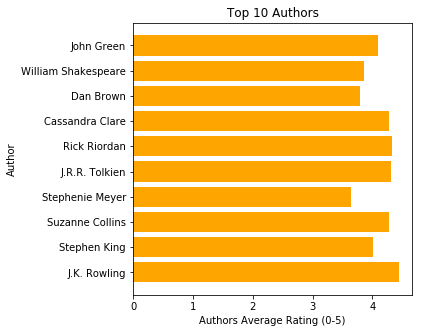

In [100]:

fig= plt.figure(figsize=(5,5))
plt.barh(new["name"], new["authors_average_rating"], color = "orange")
plt.xlabel("Authors Average Rating (0-5)")
plt.ylabel("Author")
plt.title("Top 10 Authors")

In [73]:
#RQ4_filtered.to_csv("RQ4_filtered.csv")

E. Research Question 5: Does authors productivity (in terms of lenths of the books written, how many books authors have written prevsiouly) contribute to books' success?

In [74]:
authors_df

,average_rating,author_id,text_reviews_count,name,ratings_count
0,3.98,604031,7,Ronald J. Fields,49
1,4.08,626222,28716,Anita Diamant,546796
2,3.92,10333,5075,Barbara Hambly,122118
3,3.68,9212,36262,Jennifer Weiner,888522
4,3.82,149918,96,Nigel Pennick,1740
...,...,...,...,...,...
829524,4.36,197551,4,Patty Furbush,11
829525,4.33,3988103,3,Jim Schlinkman,6
829526,4.00,13464507,2,Rich Jolly,18
829527,3.31,7427847,1,sr@ mwrGn,13


In [75]:
merged.book_id

0         5333265
1         1333909
2        22240073
3          829305
4           47182
           ...   
49987     5020420
49988    34300575
49989    15711244
49990    25561514
49991    15711242
Name: book_id, Length: 49992, dtype: int32

In [76]:
merged.author_id.dtype

dtype('int32')

In [77]:
#group by authorid and count how many books each author has written and average number of pages authors have written


total_books = merged.groupby("author_id").agg(total_books = pd.NamedAgg(column = "book_id", aggfunc = 'count'), total_pages = pd.NamedAgg(column = "num_pages", aggfunc = 'sum'))
total_books = total_books[(total_books['total_pages'].str.len() != 0)]

In [78]:
total_books

,total_books,total_pages
author_id,,
4,12,192628208207242628216288192214358224
7,11,24251249756061569288379269432
10,1,528
14,2,361288
16,13,431160390144385112168265
...,...,...
17255261,1,219
17264133,1,64
17265337,1,98


In [79]:
pd.to_numeric(total_books.total_pages, downcast = 'float',errors='coerce')
pd.to_numeric(total_books.total_books, downcast = 'float', errors='coerce')


author_id
4           12.0
7           11.0
10           1.0
14           2.0
16          13.0
            ... 
17255261     1.0
17264133     1.0
17265337     1.0
17290483     1.0
17300081     1.0
Name: total_books, Length: 24938, dtype: float32

In [80]:
total_books["pgs_per_book"] = total_books["total_pages"].astype(np.float32)/total_books["total_books"].astype(np.float32)

In [81]:
total_books

,total_books,total_pages,pgs_per_book
author_id,,,
4,12,192628208207242628216288192214358224,1.605235e+34
7,11,24251249756061569288379269432,2.204659e+27
10,1,528,5.280000e+02
14,2,361288,1.806440e+05
16,13,431160390144385112168265,3.316619e+22
...,...,...,...
17255261,1,219,2.190000e+02
17264133,1,64,6.400000e+01
17265337,1,98,9.800000e+01


In [82]:
merged2 = merged[merged.author_id.isin(total_books.index)].join(total_books[["total_books","pgs_per_book"]],on="author_id")

In [144]:
merged2.shape

(38488, 36)

In [83]:
merged2.columns

Index(['isbn', 'books_reviews_count', 'series', 'country_code',
       'language_code', 'asin', 'is_ebook', 'books_average_rating',
       'kindle_asin', 'similar_books', 'description', 'format', 'authors',
       'publisher', 'num_pages', 'publication_day', 'isbn13',
       'publication_month', 'edition_information', 'publication_year',
       'book_id', 'books_ratings_count', 'work_id', 'title',
       'title_without_series', 'author_id', 'authors_average_rating',
       'authors_text_reviews_count', 'name', 'authors_ratings_count', 'genres',
       'fiction_or_nonFiction', 'series or not', 'log_weighted_rating',
       'total_books', 'pgs_per_book'],
      dtype='object')

In [84]:
RQ5_filtered = merged[merged.author_id.isin(total_books.index)].join(total_books[["total_books","pgs_per_book"]],on="author_id")

In [85]:
RQ5_filtered.columns

Index(['isbn', 'books_reviews_count', 'series', 'country_code',
       'language_code', 'asin', 'is_ebook', 'books_average_rating',
       'kindle_asin', 'similar_books', 'description', 'format', 'authors',
       'publisher', 'num_pages', 'publication_day', 'isbn13',
       'publication_month', 'edition_information', 'publication_year',
       'book_id', 'books_ratings_count', 'work_id', 'title',
       'title_without_series', 'author_id', 'authors_average_rating',
       'authors_text_reviews_count', 'name', 'authors_ratings_count', 'genres',
       'fiction_or_nonFiction', 'series or not', 'log_weighted_rating',
       'total_books', 'pgs_per_book'],
      dtype='object')

In [86]:
books_per_author = RQ5_filtered[["name","total_books"]]
books_per_author1 = books_per_author.drop_duplicates()
books_per_author1

,name,total_books
0,Ronald J. Fields,1
1,Anita Diamant,5
6,Barbara Hambly,5
11,Jennifer Weiner,4
17,Alfred J. Church,1
...,...,...
49981,Adrian Pierini,1
49982,Stone Patrick,1
49984,Basar Basarir,1
49989,Marwan Ja'far,1


In [87]:
authors_most_books = books_per_author1.sort_values(by="total_books",ascending = False).head(10)
authors_most_books





,name,total_books
281,Agatha Christie,91
62,Stephen King,54
2672,James Patterson,53
1383,Anonymous,52
765,Haruki Murakami,43
7113,Ann M. Martin,41
185,Isaac Asimov,40
3976,Charles Dickens,39
8195,Nora Roberts,39
2150,Arthur Conan Doyle,37


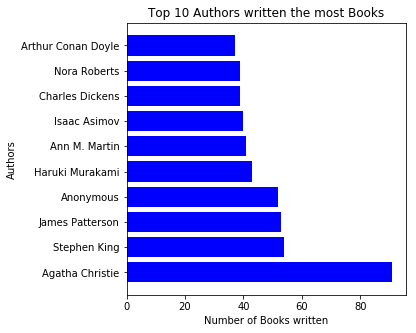

In [88]:
fig= plt.figure(figsize=(5,5))

plt.barh(authors_most_books["name"], authors_most_books["total_books"], color = "blue")

plt.ylabel("Authors")
plt.xlabel("Number of Books written")
plt.title("Top 10 Authors written the most Books")
plt.show()

In [89]:
#RQ5_filtered.to_csv("RQ5_filtered.csv")

In [137]:
merged2.shape

(38488, 36)

In [91]:
merged.columns

Index(['isbn', 'books_reviews_count', 'series', 'country_code',
       'language_code', 'asin', 'is_ebook', 'books_average_rating',
       'kindle_asin', 'similar_books', 'description', 'format', 'authors',
       'publisher', 'num_pages', 'publication_day', 'isbn13',
       'publication_month', 'edition_information', 'publication_year',
       'book_id', 'books_ratings_count', 'work_id', 'title',
       'title_without_series', 'author_id', 'authors_average_rating',
       'authors_text_reviews_count', 'name', 'authors_ratings_count', 'genres',
       'fiction_or_nonFiction', 'series or not', 'log_weighted_rating'],
      dtype='object')

In [138]:
merged.shape

(49992, 34)

In [92]:
merged2.columns

Index(['isbn', 'books_reviews_count', 'series', 'country_code',
       'language_code', 'asin', 'is_ebook', 'books_average_rating',
       'kindle_asin', 'similar_books', 'description', 'format', 'authors',
       'publisher', 'num_pages', 'publication_day', 'isbn13',
       'publication_month', 'edition_information', 'publication_year',
       'book_id', 'books_ratings_count', 'work_id', 'title',
       'title_without_series', 'author_id', 'authors_average_rating',
       'authors_text_reviews_count', 'name', 'authors_ratings_count', 'genres',
       'fiction_or_nonFiction', 'series or not', 'log_weighted_rating',
       'total_books', 'pgs_per_book'],
      dtype='object')

In [93]:
merged2["fiction_or_nonFiction"]

0        0
1        0
2        0
3        0
4        1
        ..
49981    0
49982    0
49984    0
49989    1
49991    0
Name: fiction_or_nonFiction, Length: 38488, dtype: int64

Which Publishers published the most successful books?

In [101]:
toppublishers= merged2[["publisher", "title", "log_weighted_rating"]]
toppublishers1= toppublishers.drop_duplicates()
toppublishers1

,publisher,title,log_weighted_rating
0,St. Martin's Press,W.C. Fields: A Life on Film,2.484907
1,Simon & Schuster Audio,Good Harbor,3.475067
2,Picador,The Red Tent,6.323355
3,Pan Books,The Red Tent,7.556742
4,Schocken Books Inc,"Saying Kaddish: How to Comfort the Dying, Bury...",6.098344
...,...,...,...
49981,CommTOOLS,Designers GO!,2.564180
49982,Xlibris,The Fallen Body,3.537475
49984,Can Yayinlari,Teklifinizle İlgilenmiyorum,4.664759
49989,PT Gramedia Pustaka Utama,Energynomics: Ideologi Baru Dunia,1.609438


In [102]:
toppublishers1 = toppublishers1.sort_values(by= "log_weighted_rating", ascending= False).head(10)

In [103]:
toppublishers1

,publisher,title,log_weighted_rating
6750,Alfred A. Knopf,"The Girl Who Played with Fire (Millennium, #2)",14.702244
32281,Random House,"Unbroken: A World War II Story of Survival, Re...",14.611566
7489,Penguin Group DAW Hardcover,The Name of the Wind (The Kingkiller Chronicle...,14.455091
2022,Plaza y Janes,"Jurassic Park (Jurassic Park, #1)",14.391172
15815,Hyperion,The Five People You Meet in Heaven,14.385714
2303,Scholastic Press,"Shiver (The Wolves of Mercy Falls, #1)",14.126174
2096,William Morrow,Good Omens: The Nice and Accurate Prophecies o...,14.082922
2416,Tor Books,"The Eye of the World (Wheel of Time, #1)",13.925293
9206,Dutton Juvenile,Anna and the French Kiss (Anna and the French ...,13.900009
1525,,"Betrayed (House of Night, #2)",13.607402


Text(0.5, 1.0, 'Top Publishing Companies')

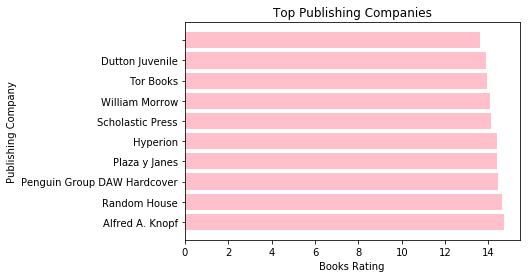

In [104]:
plt.barh(toppublishers1["publisher"], toppublishers1["log_weighted_rating"], color = "pink")

plt.xlabel("Books Rating")
plt.ylabel("Publishing Company")
plt.title("Top Publishing Companies")

Clean up ids in publishers column, for machine learning models testing. 

In [105]:
#transform publishers column into dictionary set to numerical values. 

pub_dict = {}
k = 0
for i in set(merged2.publisher):
    pub_dict[i] = k
    k+=1

In [106]:
merged2["publisher"].replace(pub_dict, inplace = True)

Save final dataframe file into an excel file that can be read in to different ML model notebooks. (note the excel file is could  not be saved in in Github due to the large size, please comment out  the below line to save to drive)

In [107]:
#merged2.to_csv("merged2_50k.csv")

In [148]:
merged2[["title","name", "books_average_rating","books_ratings_count", "fiction_or_nonFiction", "series or not", "log_weighted_rating"]]

,title,name,books_average_rating,books_ratings_count,fiction_or_nonFiction,series or not,log_weighted_rating
0,W.C. Fields: A Life on Film,Ronald J. Fields,4.00,3,0,0,2.484907
1,Good Harbor,Anita Diamant,3.23,10,0,0,3.475067
2,The Red Tent,Anita Diamant,4.16,134,0,0,6.323355
3,The Red Tent,Anita Diamant,4.16,460,0,0,7.556742
4,"Saying Kaddish: How to Comfort the Dying, Bury...",Anita Diamant,4.16,107,1,0,6.098344
...,...,...,...,...,...,...,...
49981,Designers GO!,Adrian Pierini,4.33,3,0,0,2.564180
49982,The Fallen Body,Stone Patrick,3.82,9,0,0,3.537475
49984,Teklifinizle İlgilenmiyorum,Basar Basarir,3.66,29,0,0,4.664759
49989,Energynomics: Ideologi Baru Dunia,Marwan Ja'far,2.50,2,1,0,1.609438


## Plots

EDA plots

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

In [112]:
merged2.columns

Index(['isbn', 'books_reviews_count', 'series', 'country_code',
       'language_code', 'asin', 'is_ebook', 'books_average_rating',
       'kindle_asin', 'similar_books', 'description', 'format', 'authors',
       'publisher', 'num_pages', 'publication_day', 'isbn13',
       'publication_month', 'edition_information', 'publication_year',
       'book_id', 'books_ratings_count', 'work_id', 'title',
       'title_without_series', 'author_id', 'authors_average_rating',
       'authors_text_reviews_count', 'name', 'authors_ratings_count', 'genres',
       'fiction_or_nonFiction', 'series or not', 'log_weighted_rating',
       'total_books', 'pgs_per_book'],
      dtype='object')

1. Which books typically have higher book ratings, non fiction novels or fiction novels?

Text(0.5, 1.0, 'Fiction and NonFiction Books Ratings')

<Figure size 576x576 with 0 Axes>

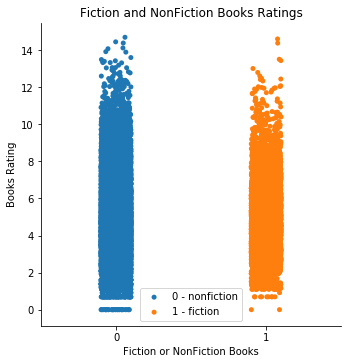

In [145]:
#1- non fiction, 0 - fiction
fig= plt.figure(figsize=(8,8))
sns.catplot(x="fiction_or_nonFiction", y="log_weighted_rating", data=merged2[:30000])

labels= ["0 - nonfiction", "1 - fiction"]
plt.legend(labels)
plt.xlabel("Fiction or NonFiction Books")
plt.ylabel("Books Rating")
plt.title("Fiction and NonFiction Books Ratings")

2. Which months published the most books?

In [115]:
months = merged2[["publication_month", "total_books"]]
nan_value = float("NaN")
months.replace("", nan_value, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [116]:
months2 = months.dropna()

    

In [117]:
months2.publication_month.apply(int)

0         9
1        10
2        11
4         7
5        10
         ..
49979     9
49980    11
49982    10
49984    10
49989    10
Name: publication_month, Length: 28443, dtype: int64

In [118]:
month_name=[]
for i in months2.publication_month:
    x=int(i)
    #print(type(x))
    month_name.append(calendar.month_name[x])

In [119]:
months2["month name"]=month_name

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [120]:
months2[:2]

,publication_month,total_books,month name
0,9,1,September
1,10,5,October


In [121]:


books_per_month = months2.groupby("month name").agg(books_per_month = pd.NamedAgg(column = "total_books", aggfunc= "count"))


months3 = months2[months2["month name"].isin(books_per_month.index)].join(books_per_month["books_per_month"], on = "month name")



In [122]:
books_per_month.index

Index(['April', 'August', 'December', 'February', 'January', 'July', 'June',
       'March', 'May', 'November', 'October', 'September'],
      dtype='object', name='month name')

In [123]:
books_per_month

,books_per_month
month name,
April,2572
August,2306
December,1790
February,2008
January,2593
July,2044
June,2255
March,2508
May,2416


Text(0.5, 1.0, 'Number of Books Published per Month')

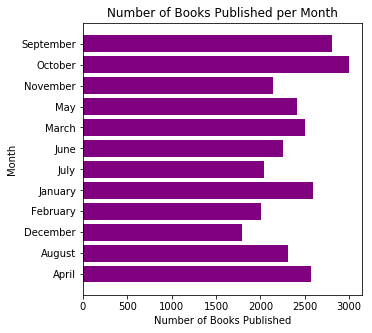

In [208]:
fig= plt.figure(figsize=(5,5))


plt.barh(books_per_month.index, books_per_month["books_per_month"], color = "purple")

plt.xlabel("Number of Books Published")
plt.ylabel("Month")
plt.title("Number of Books Published per Month")

3. Are books part of a series more successful than books not part of a series?

Text(0.5, 1.0, 'Book series overall ratings')

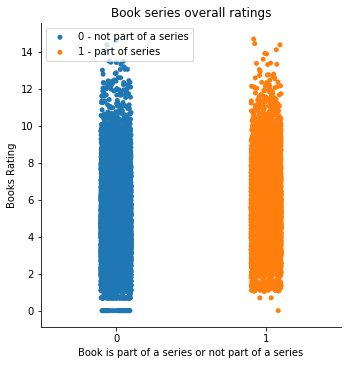

In [146]:
# log average weighted
sns.catplot(x="series or not", y="log_weighted_rating" ,data=merged2[:30000])
labels= ["0 - not part of a series", "1 - part of series"]
plt.legend(labels)
plt.xlabel("Book is part of a series or not part of a series")
plt.ylabel("Books Rating")
plt.title("Book series overall ratings")

4. Which books are the longest (largest length of pages)?

In [127]:

longest_books = merged2[["title","num_pages"]]
nan_value = float("NaN")
longest_books.replace("", nan_value, inplace=True)
longest_books2=longest_books.dropna()

In [128]:
longestbooks2 = longest_books2.sort_values("num_pages", ascending = False).head(10)

In [129]:
longestbooks2

,title,num_pages
9507,The Kindly Ones,994
47168,Foundations of Multidimensional and Metric Dat...,993
7657,"2107 Curious Word Origins, Sayings & Expressio...",992
43034,The Plant Finder: The Right Plants for Every G...,992
49759,Democracy in America,992
26029,Holly Black's Modern Faerie Tales: Tithe; Vali...,992
34548,Goebbels,992
48187,En barnlig komedie og andre fortællinger - jub...,99
40321,Astronomical (Astronomers #1),99
2871,A Pérola,99


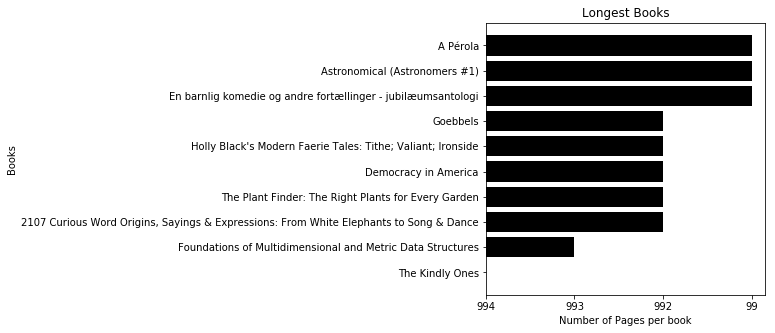

In [130]:
fig= plt.figure(figsize=(5,5))

plt.barh(longestbooks2["title"], longestbooks2["num_pages"], color = "black")

plt.ylabel("Books")
plt.xlabel("Number of Pages per book")
plt.title("Longest Books")
plt.show()

5. Are books with the most ratings counts have the highest rating?

In [168]:
top_counts= merged[["books_ratings_count", "log_weighted_rating"]]
pd.to_numeric(top_counts["books_ratings_count"])

0          3
1         10
2        134
3        460
4        107
        ... 
49987      5
49988      1
49989      2
49990      8
49991     23
Name: books_ratings_count, Length: 49992, dtype: int64

In [171]:
top_counts["books_ratings_count"] = top_counts["books_ratings_count"].apply(pd.to_numeric)
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Books Ratings Count vs Books log_weighted_rating')

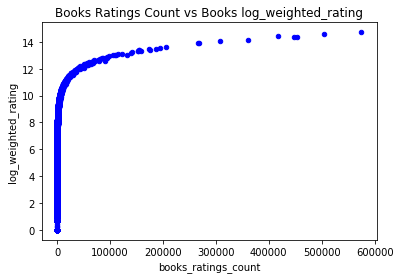

In [207]:
top_counts.plot(kind= "scatter", x= "books_ratings_count", y = "log_weighted_rating", color = "blue")
plt.title("Books Ratings Count vs Books log_weighted_rating")



6. Are books with more reviews more sucessful?

In [182]:
top_reviews = merged2[["books_reviews_count","log_weighted_rating"]]
top_reviews["books_reviews_count"] = top_reviews["books_reviews_count"].apply(pd.to_numeric)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Books Reviews Count vs Books log_weighted_rating')

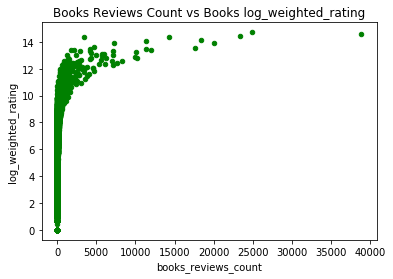

In [205]:

top_reviews.plot(kind= "scatter", x= "books_reviews_count", y = "log_weighted_rating", color = "green")

plt.title("Books Reviews Count vs Books log_weighted_rating")


7. Are longer books (more pages per book) more sucessful than shorter books?


In [190]:
longer_books = merged2[["num_pages", "log_weighted_rating"]]
longer_books["num_pages"]=longer_books["num_pages"].apply(pd.to_numeric)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(0, 3000)

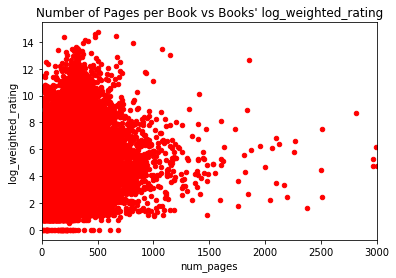

In [202]:
longer_books.plot(kind= "scatter", x= "num_pages", y = "log_weighted_rating", color = "red")
plt.title("Number of Pages per Book vs Books' log_weighted_rating")
plt.xlim([0,3000])